In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('features.csv')

In [3]:
df.head()

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,...,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
0,CL-Hiss,wildside sabrina tiktok,2,3052,0.068885,0.006089,3921.0,404.5,-7.268548,3364.872373,...,19.925640,0.810778,0.160065,-0.001847,3,0.007630,female,young,Clouded Leopard,Hiss
1,CL-Hiss,wildside sabrina tiktok,1,1649,0.067508,0.008768,2364.0,546.0,-6.702535,3613.418302,...,19.957274,0.821026,0.126885,-0.003948,3,0.010948,female,young,Clouded Leopard,Hiss
2,CL-Hiss,wildside sabrina tiktok,1,1265,0.177508,0.009763,2137.0,461.0,-6.511350,2918.727805,...,20.534935,0.800632,0.156785,-0.021016,2,0.012784,female,young,Clouded Leopard,Hiss
3,CL-Hiss,wildside sabrina tiktok,1,2671,0.047844,0.007377,4015.0,987.0,-6.980524,3696.125377,...,20.329560,0.823546,0.140679,-0.011690,3,0.009123,female,young,Clouded Leopard,Hiss
4,CL-Hiss,wildside sabrina tiktok,1,1744,0.063522,0.007763,2487.0,628.0,-5.948235,3509.912109,...,20.561726,0.807700,0.144186,-0.013389,2,0.009595,female,young,Clouded Leopard,Hiss


In [4]:
# 606, 21 with all files; 143 with only pantherinae
df.shape

(143, 21)

In [5]:
df.columns

Index(['File Name', 'Source', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS', 'Sex', 'Age', 'Species',
       'Call'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               143 non-null    object 
 1   Source                  136 non-null    object 
 2   Duration_in_Sec         143 non-null    int64  
 3   Zero_Crossings          143 non-null    int64  
 4   Amp_range               143 non-null    float64
 5   Avg_amp                 143 non-null    float64
 6   Freq_range              143 non-null    float64
 7   Pulses_per_Sec          143 non-null    float64
 8   Mean_MFCC               143 non-null    float64
 9   Mean_Spectral Rolloff   143 non-null    float64
 10  Mean_Melspectrogram     143 non-null    float64
 11  Mean_Spectral Contrast  143 non-null    float64
 12  Mean_Chromagram         143 non-null    float64
 13  Mean_Tempogram          143 non-null    float64
 14  Mean_Tonnetz            143 non-null    fl

In [7]:
df.describe(include='all')

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,...,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
count,143,136,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,63,62,143,143
unique,72,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8,7,9,12
top,Leopard_growl_4,YouTube,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Male,adult,Leopard,Prusten
freq,10,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,26,17,41,44
mean,NaN,NaN,10.531469,18892.720280,0.473706,0.043030,6535.450124,733.323111,-6.250280,3629.312818,...,19.273353,0.681821,0.146602,-0.002561,31.160839,0.056034,NaN,NaN,NaN,NaN
std,NaN,NaN,13.495854,26903.795251,0.336793,0.045686,3431.538918,581.775669,2.938998,1325.609110,...,1.876151,0.098751,0.056773,0.008978,47.427877,0.057640,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,413.000000,0.028533,0.001734,345.000000,54.666667,-14.324327,832.920861,...,12.954071,0.196460,0.009798,-0.029482,0.000000,0.002313,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.000000,2116.500000,0.157780,0.010367,3694.964286,318.930357,-7.970505,2727.665540,...,18.332792,0.638936,0.107239,-0.007237,2.500000,0.013793,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,8525.000000,0.473299,0.034064,6346.000000,532.000000,-6.099451,3613.418302,...,19.514204,0.687343,0.142212,-0.002209,9.000000,0.044117,NaN,NaN,NaN,NaN
75%,NaN,NaN,12.000000,23088.000000,0.759965,0.060890,10072.368056,1075.143804,-3.995342,4598.605606,...,20.499962,0.741507,0.188739,0.002309,39.500000,0.085491,NaN,NaN,NaN,NaN


## Data Cleansing

In [8]:
df['Call'].unique()

array(['Hiss', 'Prusten', 'Roaring sequence ', 'Roaring sequence',
       'roaring sequence', 'growl', 'puff', 'Mew', 'Growl', 'Growl ',
       'Roaring seqeunce', 'Roaring Sequence'], dtype=object)

In [9]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss','Prusten':'prusten','Roaring sequence ': 'roar','Roaring sequence':'roar', 'roaring sequence':'roar', 'Growl ':'growl',
       'Roaring seqeunce':'roar', 'Roaring Sequence':'roar'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['hiss', 'prusten', 'roar', 'growl', 'puff', 'Mew'], dtype=object)

In [10]:
df['Age'].unique()

array(['young ', 'young', nan, 'Adult', 'adult', 'A', 'A ', 'adult '],
      dtype=object)

In [11]:
clean2 = {'A':'Adult','A ':'Adult','Adult ':'Adult','adult':'Juvenile', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile',
          'young':'Juvenile','young ':'Juvenile', 'adult ':'Adult'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Juvenile', 'Unknown', 'Adult'], dtype=object)

In [12]:
df['Sex'].unique()

array(['female ', 'Female', nan, 'male ', 'Male', 'female', 'male', 'F',
       'M'], dtype=object)

In [13]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 
          'G (1 M and 2F)':'Group', 'female':'Female','female ':'Female','male':'Male'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Female', 'Unknown', 'Male'], dtype=object)

In [14]:
df.Species.unique()

array(['Clouded Leopard ', 'Clouded leopard', 'Jaguar ', 'jaguar',
       'Leopard', 'Leopard ', 'Snow Leopard ', 'Lion', 'Lion '],
      dtype=object)

In [15]:
clean4 = {'jaguar': 'Jaguar','Jaguar ':'Jaguar','Leopard ':'Leopard', 'Clouded Leopard ':'Clouded leopard','Lion ':'Lion',
          'Snow Leopard ':'Snow leopard'}

df.replace(clean4, inplace= True)
df.Species.unique()

array(['Clouded leopard', 'Jaguar', 'Leopard', 'Snow leopard', 'Lion'],
      dtype=object)

In [16]:
df['Source'].unique()

array(['wildside sabrina tiktok', 'Panther Ridge Conservation Center',
       'Wild Cat Conservation Center', 'Youtube', 'Museum f�r Naturkunde',
       'YouTube', nan], dtype=object)

In [17]:
clean5 = {'Youtube': 'YouTube'}

df.replace(clean5, inplace= True)
df.Source.unique()

array(['wildside sabrina tiktok', 'Panther Ridge Conservation Center',
       'Wild Cat Conservation Center', 'YouTube', 'Museum f�r Naturkunde',
       nan], dtype=object)

In [18]:
df.describe(include='object')

,File Name,Source,Sex,Age,Species,Call
count,143,136,143,143,143,143
unique,72,5,3,3,5,6
top,Leopard_growl_4,YouTube,Unknown,Unknown,Leopard,roar
freq,10,92,80,81,45,65


In [19]:
"Pull records containing 'Clouded leopard','Jaguar','Leopard','Lion' but not Snow Leopard due to unbalanced data"

df = df[df.Species.isin(['Clouded leopard','Jaguar','Leopard','Lion'])]

"Remove records with mew, hiss, puff"
df = df[df.Call.isin(['roar','prusten','growl'])]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 6 to 142
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   File Name               125 non-null    object 
 1   Source                  125 non-null    object 
 2   Duration_in_Sec         125 non-null    int64  
 3   Zero_Crossings          125 non-null    int64  
 4   Amp_range               125 non-null    float64
 5   Avg_amp                 125 non-null    float64
 6   Freq_range              125 non-null    float64
 7   Pulses_per_Sec          125 non-null    float64
 8   Mean_MFCC               125 non-null    float64
 9   Mean_Spectral Rolloff   125 non-null    float64
 10  Mean_Melspectrogram     125 non-null    float64
 11  Mean_Spectral Contrast  125 non-null    float64
 12  Mean_Chromagram         125 non-null    float64
 13  Mean_Tempogram          125 non-null    float64
 14  Mean_Tonnetz            125 non-null    fl

In [20]:
df.Source.value_counts()

YouTube                              87
wildside sabrina tiktok              22
Museum f�r Naturkunde                 9
Panther Ridge Conservation Center     6
Wild Cat Conservation Center          1
Name: Source, dtype: int64

In [21]:
df.Species.value_counts()

Leopard            41
Lion               33
Clouded leopard    29
Jaguar             22
Name: Species, dtype: int64

In [22]:
df.Call.value_counts()

roar       65
prusten    40
growl      20
Name: Call, dtype: int64

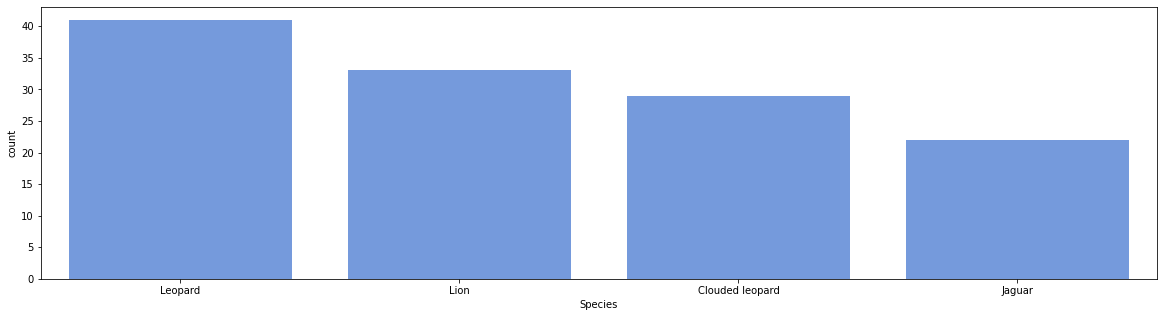

In [23]:
plt.figure(figsize=(20,5))
sns.countplot(x='Species', data=df,order = df['Species'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

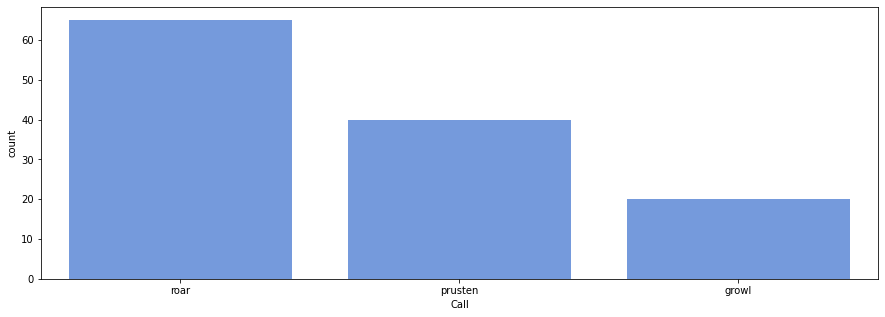

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(x='Call', data=df, order = df['Call'].value_counts().index, color='cornflowerblue')
plt.xticks()
plt.show()

<AxesSubplot:>

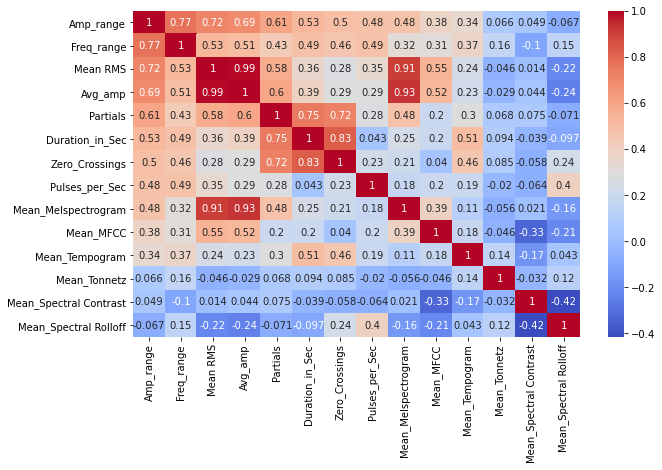

In [25]:
#Quality correlation matrix
k = 14 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

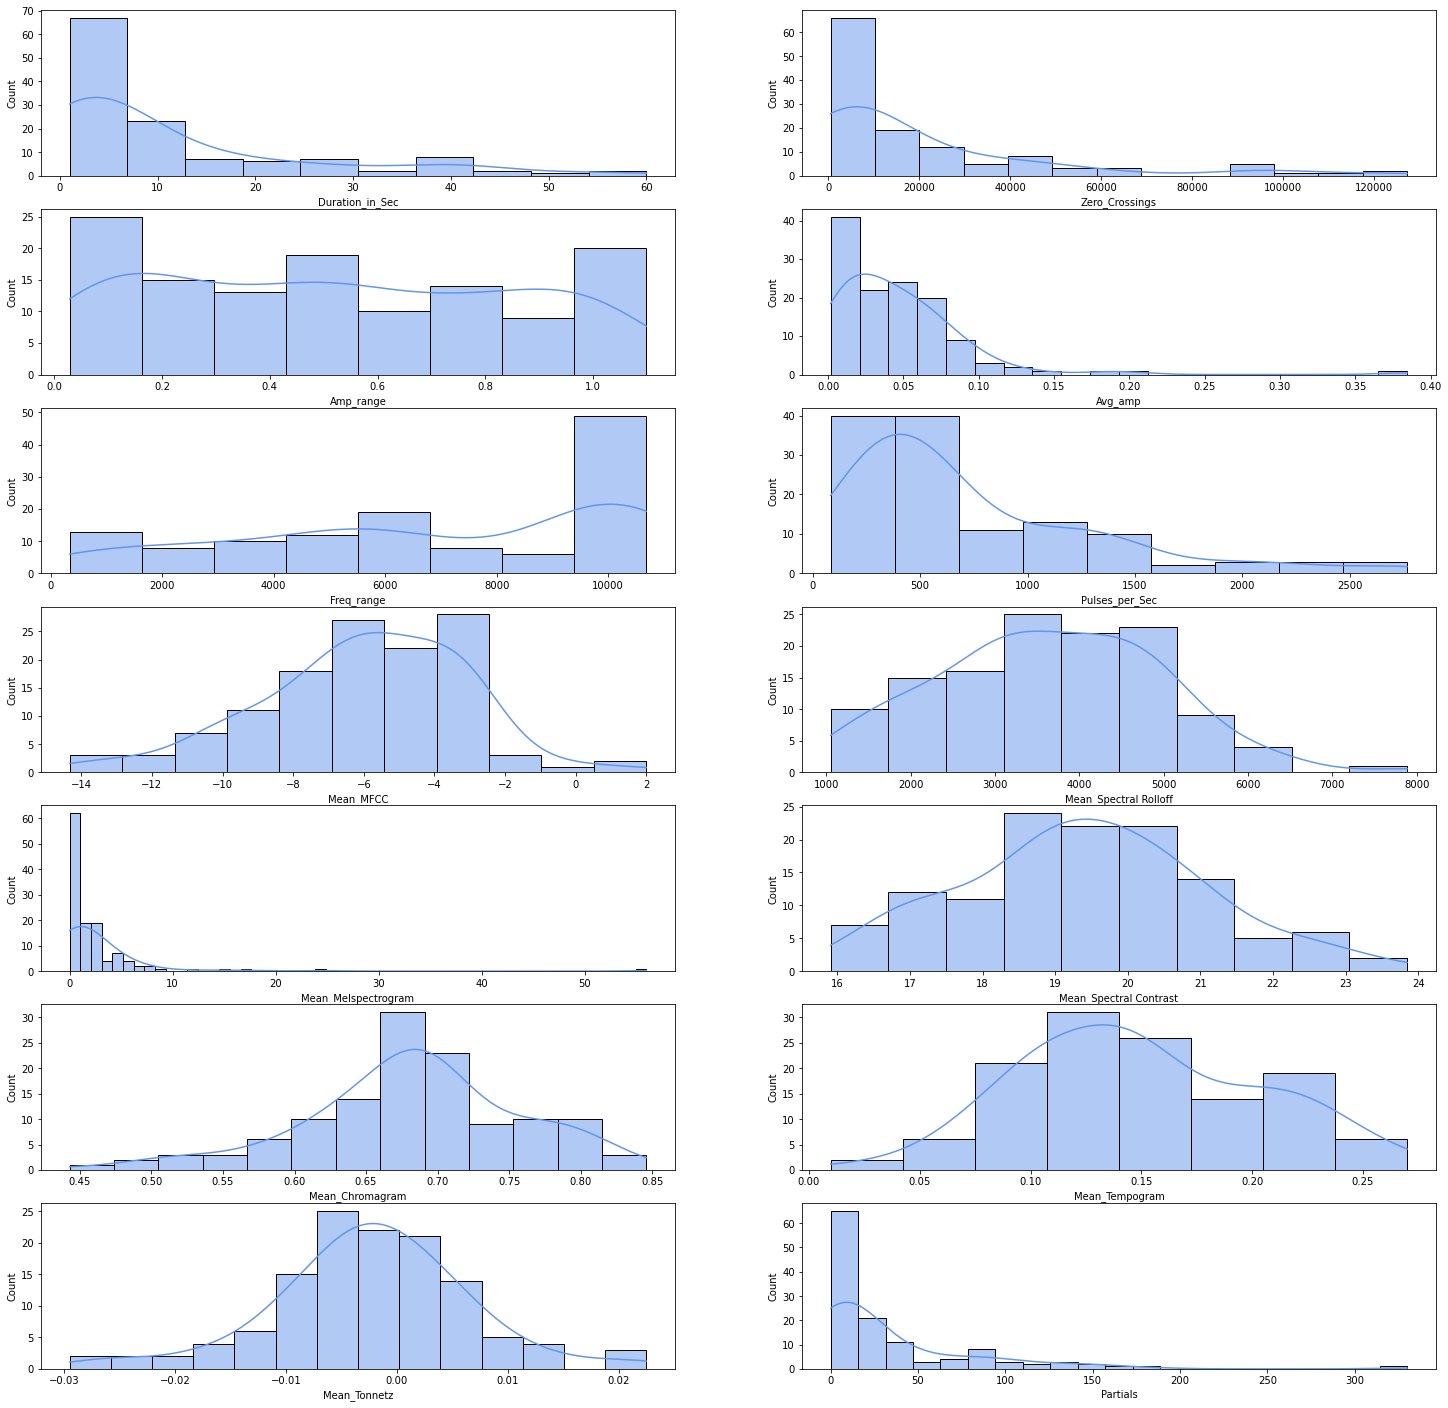

In [26]:
#Histogram to check distribution and skewness
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials']

plt.figure(figsize=(25,25))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.histplot(df[l[i]],kde=True,color='cornflowerblue') 
plt.show()

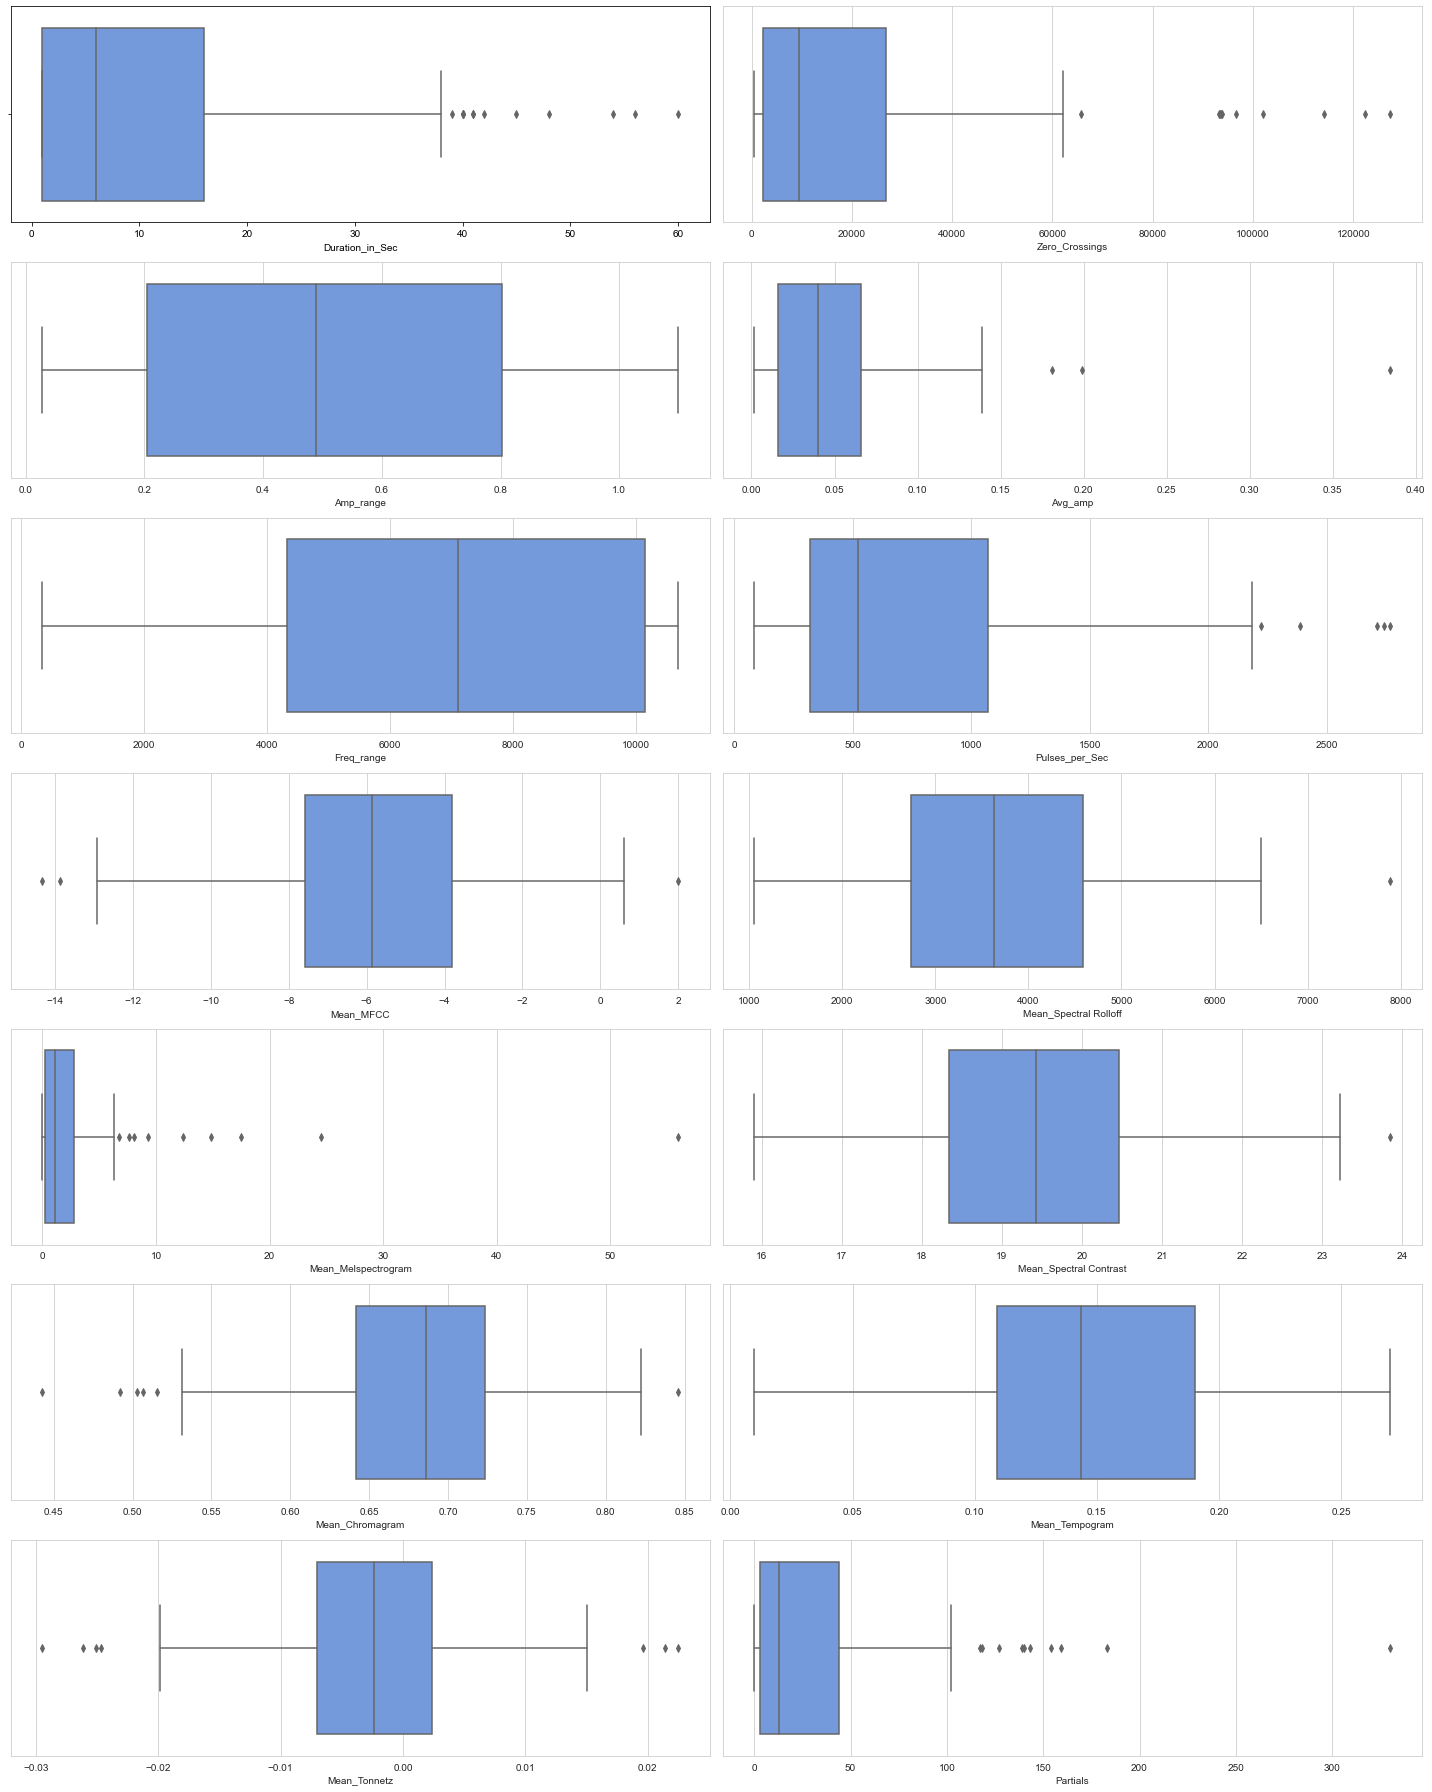

In [27]:
#Boxplot to check for outliers
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(7,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='cornflowerblue',orient='h')
    plt.tight_layout()
plt.show()    

In [28]:
#Save new clean data to new CSV
df.to_csv('features_cleaned_not_standardized.csv', index=False)

## Standardize Continuous Features

In [29]:
#standardize features separately by source to minimize overfitting

df_1 = df[df.Source.isin(['YouTube'])]

df_2 = df[df.Source.isin(['Museum f�r Naturkunde'])]

df_3 = df[df.Source.isin(['wildside sabrina tiktok'])]

df_4 = df[df.Source.isin(['Panther Ridge Conservation Center'])]

df_5 = df[df.Source.isin(['Wild Cat Conservation Center'])]

#df_6 = df[df.Source.isna() no records with null sources
         


In [30]:
continuous = ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS']

scaler = StandardScaler()

for var in continuous:
    df_1[var] = df_1[var].astype('float64')
    df_1[var] = scaler.fit_transform(df_1[var].values.reshape(-1, 1))


In [31]:
for var in continuous:
    df_2[var] = df_2[var].astype('float64')
    df_2[var] = scaler.fit_transform(df_2[var].values.reshape(-1, 1))

for var in continuous:
    df_3[var] = df_3[var].astype('float64')
    df_3[var] = scaler.fit_transform(df_3[var].values.reshape(-1, 1))
    
for var in continuous:
    df_4[var] = df_4[var].astype('float64')
    df_4[var] = scaler.fit_transform(df_4[var].values.reshape(-1, 1))
    
for var in continuous:
    df_5[var] = df_5[var].astype('float64')
    df_5[var] = scaler.fit_transform(df_5[var].values.reshape(-1, 1))
    
'''
for var in continuous:
    df_6[var] = df_6[var].astype('float64')
    df_6[var] = scaler.fit_transform(df_6[var].values.reshape(-1, 1))
'''

"\nfor var in continuous:\n    df_6[var] = df_6[var].astype('float64')\n    df_6[var] = scaler.fit_transform(df_6[var].values.reshape(-1, 1))\n"

In [32]:
df.describe(include='float64')

,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Mean RMS
count,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,0.517192,0.046648,6816.822300,740.182720,-5.999343,3636.605690,2.657481,19.388709,0.682981,0.149270,-0.002335,0.060855
std,0.332992,0.046934,3363.276869,600.786663,2.909455,1325.340065,5.932160,1.674431,0.075508,0.054610,0.008933,0.059085
min,0.028533,0.001734,345.000000,84.000000,-14.324327,1053.323270,0.001152,15.907301,0.442893,0.009798,-0.029482,0.002313
25%,0.204905,0.015786,4316.028663,318.575000,-7.586954,2738.876620,0.186386,18.342539,0.641454,0.108987,-0.007023,0.020974
50%,0.489816,0.039952,7107.500000,521.000000,-5.861274,3631.954339,1.102398,19.422573,0.685881,0.143524,-0.002345,0.050762
75%,0.802833,0.065955,10140.178571,1071.444444,-3.807588,4591.137850,2.785847,20.464988,0.723149,0.190296,0.002353,0.088434
max,1.098874,0.384435,10681.044444,2766.714286,1.995642,7885.786974,55.972710,23.847936,0.845854,0.269959,0.022494,0.475639


In [33]:
frames = [df_1, df_2, df_3, df_4, df_5]

df = pd.concat(frames)

df

,File Name,Source,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,...,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
35,Jaguar-Prusten-1,YouTube,-0.910261,-0.795113,-0.026289,-0.340803,-0.421387,0.841685,1.678653,0.602295,...,-0.960260,1.658664,-1.111745,-0.286268,-0.542962,-0.351621,Unknown,Unknown,Jaguar,prusten
36,Jaguar-Prusten-1,YouTube,-0.910261,-0.731692,-1.835643,-1.096620,-0.806636,-0.149255,-1.135978,1.755714,...,-1.536667,1.649726,-0.907964,-1.106560,-0.819205,-1.141334,Unknown,Unknown,Jaguar,prusten
37,Jaguar-Prusten-1,YouTube,-0.910261,-0.796018,-2.008571,-1.128298,-2.590927,-1.092495,-0.658015,1.380373,...,-1.897691,2.147499,-0.637609,-0.447219,-0.837621,-1.176774,Unknown,Unknown,Jaguar,prusten
38,Jaguar-Prusten-1,YouTube,-0.910261,-0.800061,-1.848767,-1.045017,-2.608628,-1.110959,-0.088006,0.894245,...,-1.426091,1.201418,-1.004796,-1.124444,-0.837621,-1.091462,Unknown,Unknown,Jaguar,prusten
39,Jaguar-Prusten-1,YouTube,-0.910261,-0.827098,-1.798203,-0.940222,-0.861820,-0.517011,1.124259,0.839965,...,-1.198614,1.147553,-1.176638,1.237532,-0.837621,-0.994099,Unknown,Unknown,Jaguar,prusten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,0.635885,-0.487616,-0.603396,-0.019195,-0.015400,-0.294678,0.182709,...,-0.223790,1.130458,-0.231528,-0.457972,-1.078328,-0.570986,Female,Juvenile,Clouded leopard,prusten
9,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,-0.098248,-0.581848,-1.011123,-1.262502,-0.904174,-1.021838,0.726412,...,0.138953,-1.090032,-0.118517,-1.726786,-0.107833,-0.981823,Female,Juvenile,Clouded leopard,prusten
10,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,0.354785,-0.101002,1.348599,2.040031,0.470786,0.556562,1.427305,...,-1.032765,-1.140717,-1.670548,0.510505,1.186161,1.134059,Female,Juvenile,Clouded leopard,prusten
11,CL-Prusten-1,Panther Ridge Conservation Center,0.000000,-1.716615,-0.468283,-0.955309,-0.385989,-1.460757,-1.371102,-0.590996,...,-0.698894,1.045821,0.925477,1.586653,-1.401826,-0.932431,Female,Juvenile,Clouded leopard,prusten


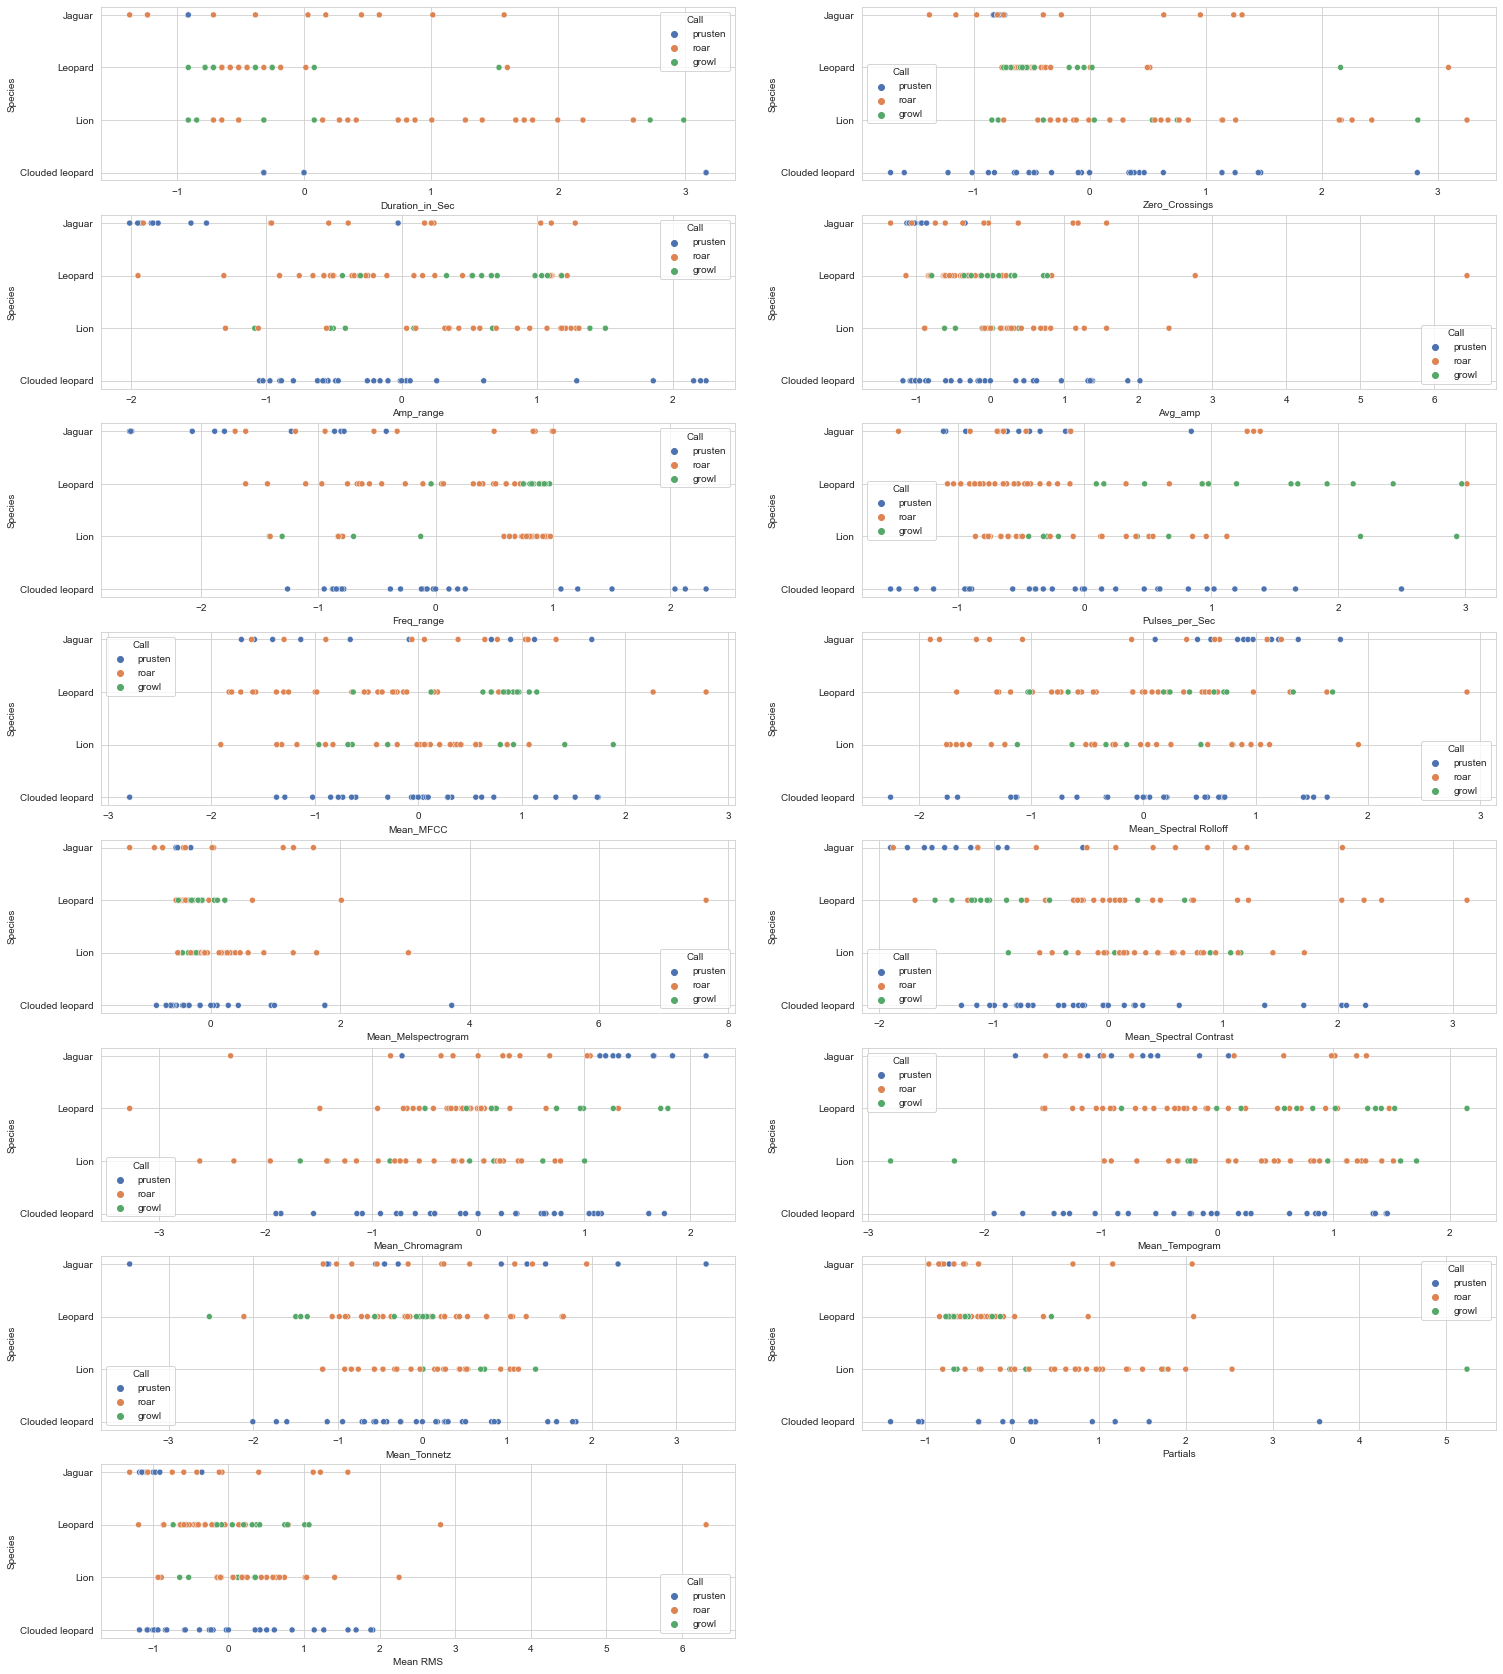

In [34]:
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials','Mean RMS']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(8,2,i+1)
    sns.scatterplot(df[l[i]], df['Species'], hue=df['Call'], legend='brief', palette='deep') 
plt.savefig('Species Clusters By Features.pdf')
plt.show()

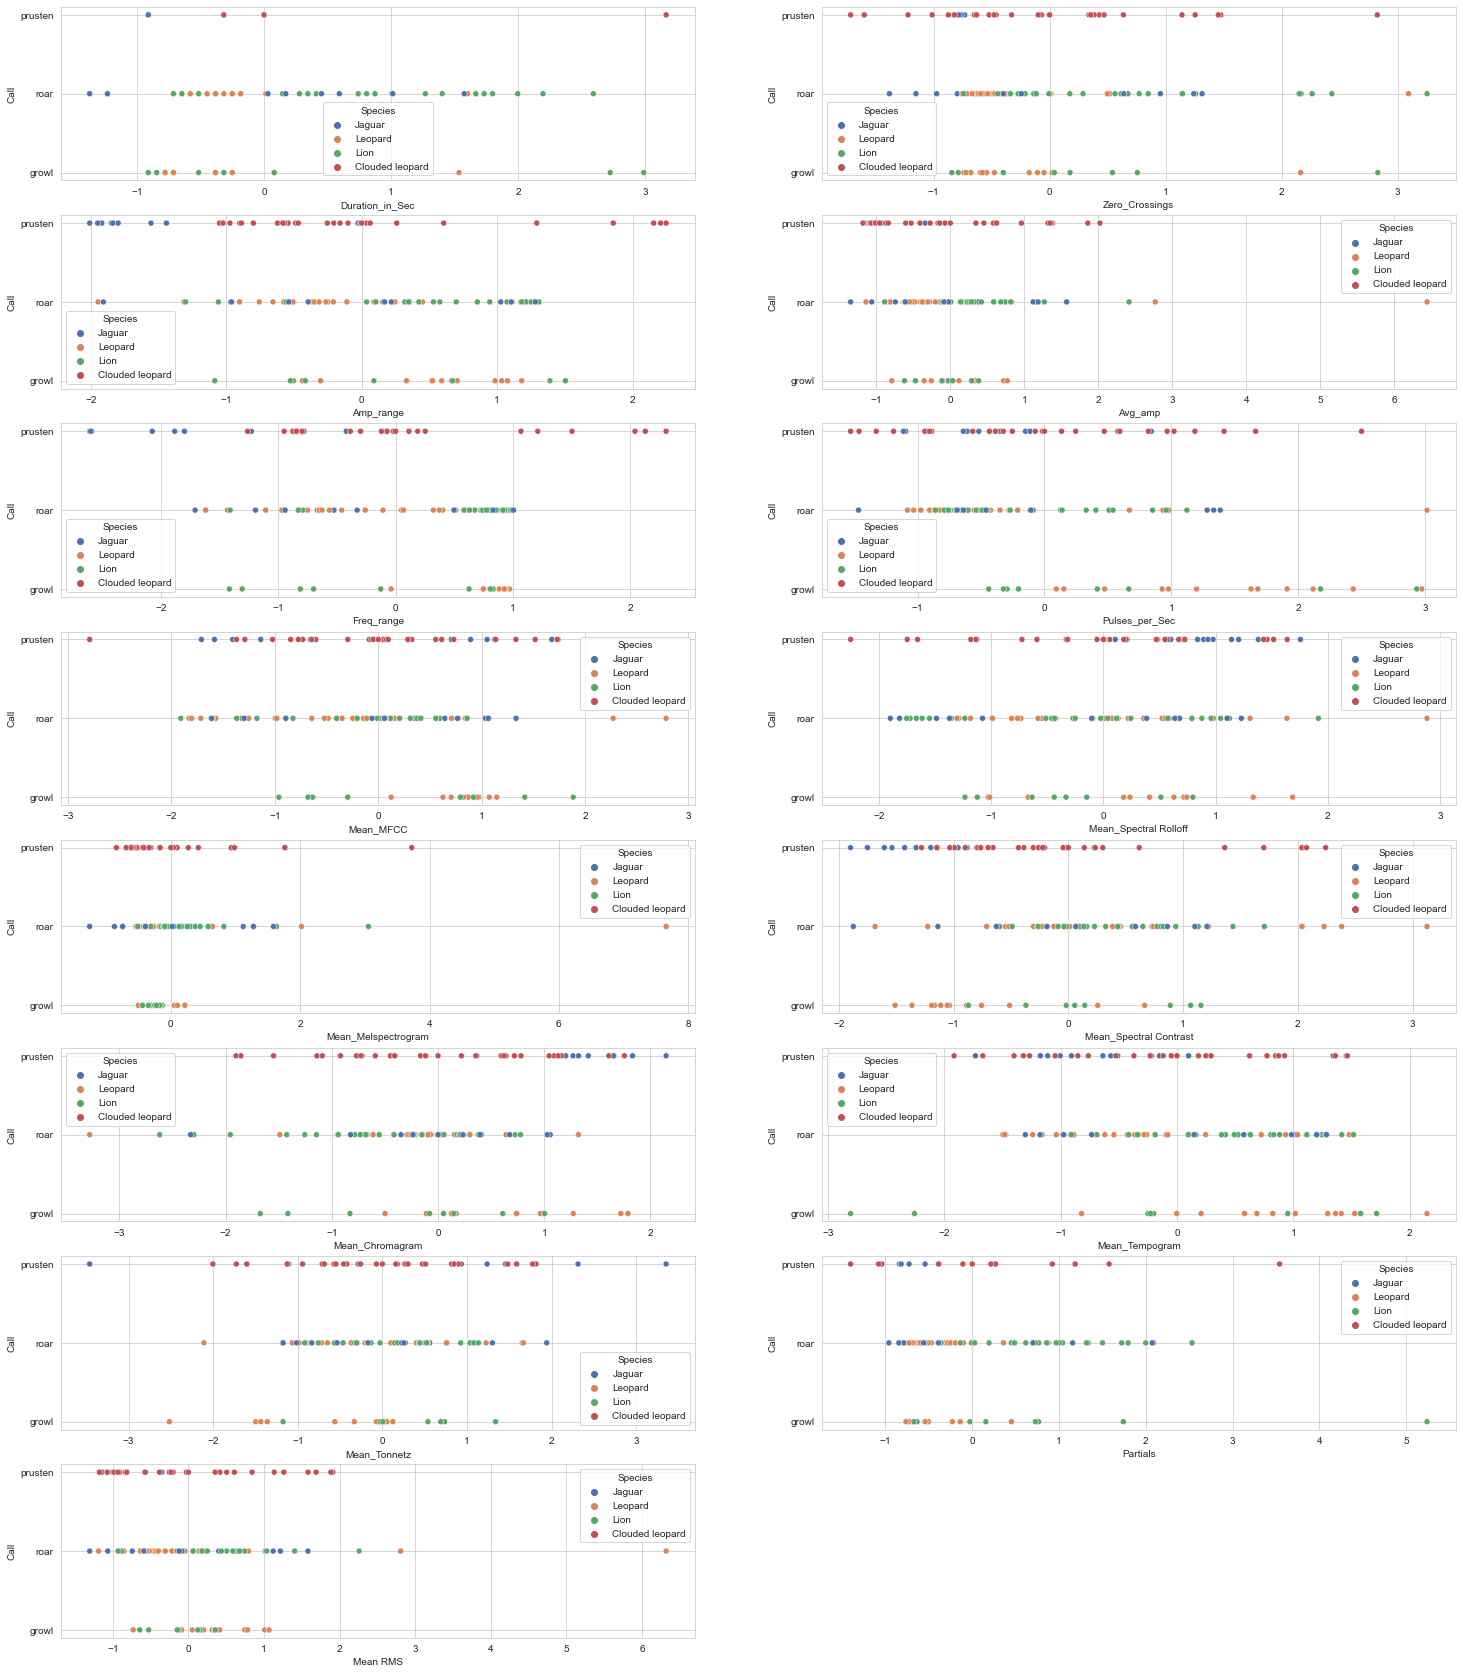

In [35]:
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials','Mean RMS']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(8,2,i+1)
    sns.scatterplot(df[l[i]], df['Call'], hue=df['Species'], legend='brief', palette='deep') 
plt.savefig('Call Clusters By Features.pdf')
plt.show()

In [36]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)